In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
import utils as ut
from models import Model
from layers import Linear, Flatten
from activation_functions import Sigmoid, Tanh, ReLU, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tqdm import tqdm
from collections import Counter

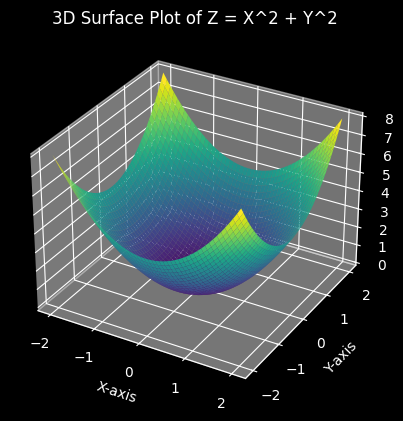

Shapes: X: (50, 50), Y: (50, 50), Z: (50, 50)
Shapes: X: (2500, 2), y: (2500,)
n_samples -> 1750
n_features -> 2
Shape of X_train -> (1750, 2)
Shape of y_train -> (1750, 1)
First 5 samples of X_train: [[0.04081633 0.63265306]
 [0.81632653 0.91836735]
 [0.97959184 0.55102041]
 [0.51020408 0.71428571]
 [1.         0.91836735]]
First 5 samples of y_train: [[3.65514369]
 [4.40149938]
 [3.72178259]
 [0.73635985]
 [6.80049979]]


In [2]:
# z = x**2 + y**2 3D Paraboloid regression

# Create a 2D grid of points in the range [-2, 2]
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Calculate Z using the surface formula
Z = X**2 + Y**2  # shape: (50, 50)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("3D Surface Plot of Z = X^2 + Y^2")
plt.show()

print(f"Shapes: X: {X.shape}, Y: {Y.shape}, Z: {Z.shape}")

X = np.stack([X.ravel(), Y.ravel()], axis=1)
y = Z.ravel()
print(f"Shapes: X: {X.shape}, y: {y.shape}")

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.9, random_state=42
)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"n_samples -> {X_train.shape[0]}")
print(f"n_features -> {X_train.shape[1]}")
print(f"Shape of X_train -> {X_train.shape}")
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(f"Shape of y_train -> {y_train.shape}")

print("First 5 samples of X_train:", X_train[:5])
print("First 5 samples of y_train:", y_train[:5])

In [3]:
model = Model(ls.mse)
model.add(Linear(2, 12, ReLU()))  # Increase neurons and use Tanh
model.add(Linear(12, 24, ReLU()))
model.add(Linear(24, 12, ReLU()))
model.add(Linear(12, 1, None))
print(model)

loss, train_predictions, test_predictions = model.fit(
    (X_train, y_train),
    100,
    0.1,
    batch_size=32,
    logging_predictions=True,
    validation_data=(X_val, y_val),
)

Linear Layer (in 2, out 12), (activation relu)
Linear Layer (in 12, out 24), (activation relu)
Linear Layer (in 24, out 12), (activation relu)
Linear Layer (in 12, out 1), (activation None)
Training epoch 0
Epoch 0 loss -> 122.90535842268798
Validation loss -> 0.0
Training epoch 1
Epoch 1 loss -> 71.28021385229468
Validation loss -> 0.0
Training epoch 2
Epoch 2 loss -> 65.42254494947856
Validation loss -> 0.0
Training epoch 3
Epoch 3 loss -> 62.144943573785575
Validation loss -> 0.0
Training epoch 4
Epoch 4 loss -> 59.65045032933482
Validation loss -> 0.0
Training epoch 5
Epoch 5 loss -> 58.13246987647201
Validation loss -> 0.0
Training epoch 6
Epoch 6 loss -> 56.32606228491301
Validation loss -> 0.0
Training epoch 7
Epoch 7 loss -> 55.17420068865289
Validation loss -> 0.0
Training epoch 8
Epoch 8 loss -> 53.61962137945525
Validation loss -> 0.0
Training epoch 9
Epoch 9 loss -> 52.542499277305446
Validation loss -> 0.0
Training epoch 10
Epoch 10 loss -> 50.846638491565216
Validation lo

train_predictions shape: (100, 54, 32, 1)
test_predictions shape: (100, 1, 32, 1)


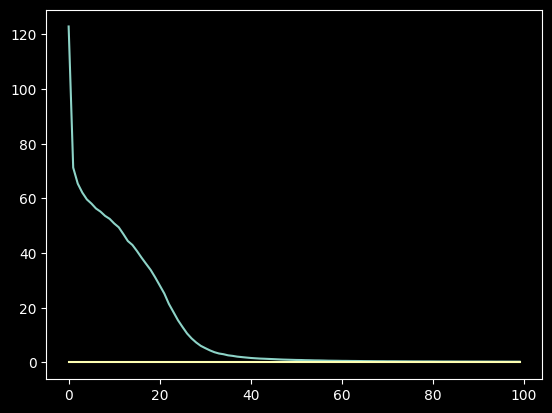

In [10]:
plt.plot(loss["train"], label="Train Loss")
plt.plot(loss["val"], label="Validation Loss")
print(f"train_predictions shape: {train_predictions.shape}")
print(f"test_predictions shape: {test_predictions.shape}")

In [5]:
# Test the model
predictions = model.predict(X_test)
# get loss
test_loss = ls.mse(y_test, predictions)
print(f"Test Loss: {test_loss}")

Test Loss: 0.01414192813090612


Shape of X_test_unraveled: (675,)
Shape of Y_test_unraveled: (675,)
Shape of Z_predictions: (675,)
Shape of Z_test_unraveled: (675,)


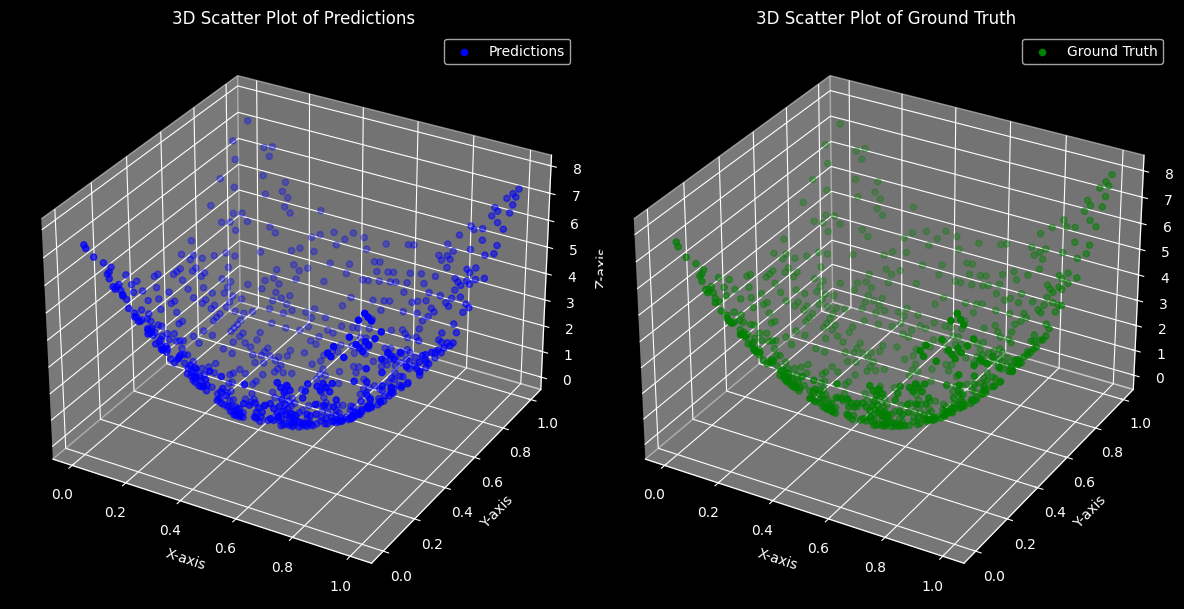

In [6]:
X_test_unraveled = X_test[:, 0]
Y_test_unraveled = X_test[:, 1]
Z_predictions = predictions.ravel()
Z_test_unraveled = y_test.ravel()

print(f"Shape of X_test_unraveled: {X_test_unraveled.shape}")
print(f"Shape of Y_test_unraveled: {Y_test_unraveled.shape}")
print(f"Shape of Z_predictions: {Z_predictions.shape}")
print(f"Shape of Z_test_unraveled: {Z_test_unraveled.shape}")

# Plot the unraveled data on 2 subfigures
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(
    X_test_unraveled,
    Y_test_unraveled,
    Z_predictions,
    color="blue",
    label="Predictions",
)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
ax1.set_title("3D Scatter Plot of Predictions")
ax1.legend()

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(
    X_test_unraveled,
    Y_test_unraveled,
    Z_test_unraveled,
    color="green",
    label="Ground Truth",
)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
ax2.set_title("3D Scatter Plot of Ground Truth")
ax2.legend()

plt.tight_layout()
plt.show()

# Animate

Animate the loss thanks to mr github copilot.

Shape of X_train_unraveled: (1750,)
Shape of Y_train_unraveled: (1750,)
Shape of Z_train_predictions: (172800,)
Shape of X_train_unraveled: (500,)
Shape of Y_train_unraveled: (500,)
Shape of Z_train_predictions: (500,)
Plotting test predictions over epochs


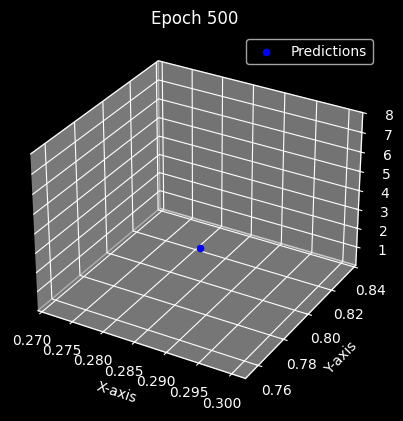

In [11]:
from visualise import (
    visualize_predictions_over_epochs,
    visualize_predictions_over_epochs_3d,
)

X_train_unraveled = X_train[:, 0]
Y_train_unraveled = X_train[:, 1]
Z_train_predictions = train_predictions.ravel()

print(f"Shape of X_train_unraveled: {X_train_unraveled.shape}")
print(f"Shape of Y_train_unraveled: {Y_train_unraveled.shape}")
print(f"Shape of Z_train_predictions: {Z_train_predictions.shape}")

# get only a random subset of the train data
indices = np.random.choice(np.arange(len(X_train_unraveled)), size=500, replace=False)
X_train_unraveled = X_train_unraveled[indices]
Y_train_unraveled = Y_train_unraveled[indices]
Z_train_predictions = Z_train_predictions[indices]

print(f"Shape of X_train_unraveled: {X_train_unraveled.shape}")
print(f"Shape of Y_train_unraveled: {Y_train_unraveled.shape}")
print(f"Shape of Z_train_predictions: {Z_train_predictions.shape}")

# print(f"Plotting train predictions over epochs")
# visualize_predictions_over_epochs_3d(
#     "../visuals/train_predictions_3d.gif",
#     Z_train_predictions,
#     X_train_unraveled,
#     Y_train_unraveled,
# )

print(f"Plotting test predictions over epochs")
visualize_predictions_over_epochs_3d(
    "../visuals/test_predictions_3d.gif",
    Z_test_unraveled,
    X_test_unraveled,
    Y_test_unraveled,
)